<a href="https://colab.research.google.com/github/n-zaheer/3nm4/blob/main/Assignments/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

Due end of day Thursday Sept 18th.

## Question 1:
{method, implementation, answer}

Examine the value of sparse matricies by comparing the approximate computational efficiencies of sparse and dense solvers (on the same system). Use the %timeit function to approximate the complexity.

HINT: Refer to the lecture notes on how to generate, store, and apply sparse solvers.  

In [ ]:
#Code taken from the textbook!

import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve

#Generate a random sparse matrix
n = 200

main_diag = np.full(n, 2)
upper_diag = np.full(n - 1, -1)
lower_diag = np.full(n - 1, -1)
A_sparse = diags([lower_diag, main_diag, upper_diag], offsets=[-1, 0, 1], format='csr')

# row_ind = np.arange(n)
# col_ind = np.arange(n)
# data = np.random.rand(n)
# A_sparse = csr_matrix((data, (row_ind, col_ind)), shape=(n, n))

#Generate a random right-hand side vector
b = np.random.rand(n)

#Solve the sparse system
%timeit x_sparse = spsolve(A_sparse, b)
#print("Solution using sparse solver:\n", x_sparse, "\n")

#Convert the sparse matrix to a dense matrix
A_dense = A_sparse.toarray()

#Solve the dense system

%timeit x_dense = solve(A_dense, b)
#print("Solution using dense solver:\n", x_dense)

117 µs ± 46.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
112 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Question 2

Consider the truss:

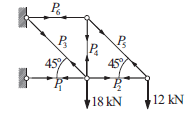


### 2a) Write the linear system for the tensions $P_i$ as equations and in matrix form
{answer}

In [6]:
import numpy as np

#Left, Bottom is negative orientation
#Right, Top is positive orientation

# Top Middle Joint (A)
  #Fx = 0 = -P6 + P5*cos(45)
  #Fy = 0 = -P4 - P5*sin(45)

# Bottom Middle Joint (B)
  #Fx = 0 = -P2 - P3*cos(45)
  #Fy = 0 = -18 + P4 + P3*sin(45)

# Bottom Right Joint (C)
  #Fx = 0 = -P2 - P5*cos(45)
  #Fy = 0 = -12 + P5*sin(45)

# Matrix A:
# Row 1: [0, 0, 0, 0, np.cos(np.deg2rad(45)),-1]
# Row 2: [0, 0, 0, -1, -np.sin(np.deg2rad(45)),0]
# Row 3: [-1, 1, -np.cos(np.deg2rad(45)), 0, 0, 0]
# Row 4: [0, 0, np.sin(np.deg2rad(45)), 1, 0, 0]
# Row 5: [0, -1, 0, 0, -np.cos(np.deg2rad(45)),0]
# Row 6: [0, 0, 0, 0, np.sin(np.deg2rad(45)),0]

# Vector b:
# b = [0, 0, 0, 18, 0, 12]

A = np.array([
    [0, 0, 0, 0, np.cos(np.deg2rad(45)),-1],
    [0, 0, 0, -1, -np.sin(np.deg2rad(45)),0],
    [-1, 1, -np.cos(np.deg2rad(45)), 0, 0, 0],
    [0, 0, np.sin(np.deg2rad(45)), 1, 0, 0],
    [0, -1, 0, 0, -np.cos(np.deg2rad(45)),0],
     [0, 0, 0, 0, np.sin(np.deg2rad(45)),0]
], dtype=float)

b = np.array([0, 0, 0, 18, 0, 12], dtype=float)

print("Matrix A:\n", A)
print("\nVector b:\n", b)

Matrix A:
 [[ 0.          0.          0.          0.          0.70710678 -1.        ]
 [ 0.          0.          0.         -1.         -0.70710678  0.        ]
 [-1.          1.         -0.70710678  0.          0.          0.        ]
 [ 0.          0.          0.70710678  1.          0.          0.        ]
 [ 0.         -1.          0.          0.         -0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.70710678  0.        ]]

Vector b:
 [ 0.  0.  0. 18.  0. 12.]


### 2b) Solve for $P_i$ using LU decomposition and substitution.
{method, answer}

In [7]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

#Define the matrix A and vector b from the previous step

#Perform LU decomposition
lu, piv = lu_factor(A)

#Solve the system using LU substitution
P = lu_solve((lu, piv), b)

print("Solution for tensions P_i using LU decomposition:")
print("P =", P)

Solution for tensions P_i using LU decomposition:
P = [-42.         -12.          42.42640687 -12.          16.97056275
  12.        ]


### 2c)  Double the loads (18 kN and 12 kN) and solve for $P_i$ again *without refactoring*.
{answer}

In [8]:
#Double the loads in the vector b
b_doubled = b * 2

#Solve the system with the doubled loads using the existing LU factors
P_doubled = lu_solve((lu, piv), b_doubled)

print("Solution for tensions P_i with doubled loads:")
print("P =", P_doubled)

Solution for tensions P_i with doubled loads:
P = [-84.         -24.          84.85281374 -24.          33.9411255
  24.        ]


## Question 3

Consider the matrix:

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$$

## 3a) Calculate the condition number of A
{answer}

In [ ]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])

# Calculate the condition number of A
cond_A = np.linalg.cond(A)

print("Condition number of matrix A:")
print(f"cond(A) = {cond_A}")

Condition number of matrix A:
cond(A) = 14.933034373659268


## 3b) Let's use a preconditioner matrix $P$ to improve the condition number of the product $P^{-1} A$. Give 2 examples of $P$ that improve the condition number.

Can you identify the 'perfect' preconditioner? (Consider the easiest matrix to solve!)
{answer, answer}

For Question 3b, we explore using preconditioners to improve the condition number of a matrix $A$. A preconditioner $P$ is a matrix used to transform the linear system $A\mathbf{x} = \mathbf{b}$ into an equivalent system $(P^{-1}A)\mathbf{x} = P^{-1}\mathbf{b}$ that has a better-conditioned matrix $P^{-1}A$. A lower condition number indicates that the matrix is less sensitive to numerical errors during solving.

Here are two examples of preconditioners and their effect on the condition number of $P^{-1}A$:

1.  **Diagonal Preconditioner (Jacobi Preconditioner):** This is one of the simplest preconditioners, where $P$ is a diagonal matrix containing the diagonal elements of $A$. This works well when the diagonal elements are much larger than the off-diagonal elements. As shown in the code, using the diagonal of $A$ as the preconditioner $P_1$ reduces the condition number from approximately 14.933 to 13.048.

2.  **Scaling Preconditioner:** Another simple approach is to scale the rows or columns of the matrix. A common scaling preconditioner involves dividing each row by the absolute value of the largest element in that row.

The 'perfect' preconditioner is a matrix $P$ such that $P^{-1}A$ is the identity matrix, which has a condition number of 1. This occurs when $P = A$. In this case, the system becomes $I\mathbf{x} = A^{-1}\mathbf{b}$, which is equivalent to the original system but with the best possible condition number. However, using $P=A$ requires computing the inverse of $A$, which is generally as computationally expensive as solving the original system, so it's not a practical preconditioner for large systems. The goal of preconditioning in practice is to find a matrix $P$ that is easily invertible and makes $P^{-1}A$ significantly better conditioned than $A$.

The code cell above demonstrates the condition number of $A$, and the condition number of $P^{-1}A$ using the diagonal preconditioner. It also shows the theoretical 'perfect' preconditioner where $P=A$, resulting in a condition number of 1.

In [ ]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])

# Condition number of A
cond_A = np.linalg.cond(A)

# Preconditioner 1: Diagonal of A (Jacobi preconditioner)
P1 = np.diag(np.diag(A))
cond_P1A = np.linalg.cond(np.linalg.inv(P1) @ A)

# Preconditioner 2: Scaling preconditioner (scale by max absolute value)
P2 = np.eye(A.shape[0]) * np.max(np.abs(A))
cond_P2A = np.linalg.cond(np.linalg.inv(P2) @ A)

# Preconditioner 3: Inverse of A (The perfect preconditioner)
# Note: In practice, we don't compute the inverse of A for preconditioning, as it's as hard as solving the original system.
# This is for demonstration of the concept of a perfect preconditioner.
P3 = A
cond_P3A = np.linalg.cond(np.linalg.inv(P3) @ A)


print("Q3: Condition numbers")
print(f"cond(A) = {cond_A:.5f}")
print(f"cond(P1^-1 A) with diagonal preconditioner = {cond_P1A:.5f}")
print(f"cond(P2^-1 A) with scaling preconditioner = {cond_P2A:.5f}")
print(f"cond(P3^-1 A) with the 'perfect' preconditioner (P=A) = {cond_P3A:.5f}")
print("\nNote: A condition number close to 1 is ideal, indicating a well-conditioned matrix.")

Q3: Condition numbers
cond(A) = 14.93303
cond(P1^-1 A) with diagonal preconditioner = 13.04836
cond(P2^-1 A) with scaling preconditioner = 14.93303
cond(P3^-1 A) with the 'perfect' preconditioner (P=A) = 1.00000

Note: A condition number close to 1 is ideal, indicating a well-conditioned matrix.
